In [12]:
import re
import pandas as pd
from transformers import AutoTokenizer

train_df = pd.read_csv('/data/ephemeral/data/train_noised(o)_remove.csv')
test_df = pd.read_csv('/data/ephemeral/data/train_noised(x)_remove.csv')

In [2]:
train_df['ratio'] = None

for idx, row in train_df.iterrows():
    text = row['text']
    kor_cnt = len(re.findall(r"[가-힣ㄱ-ㅎA-Za-z0-9]", text))
    blank_cnt = len(re.findall(r" ", text))

    ratio = kor_cnt / (len(text) - blank_cnt)
    train_df.loc[idx, 'ratio'] = ratio

In [3]:
text_list = list(train_df['text'])
text_list

['정i 파1 미사z KT 이용기간 2e 단 Q분종U2보',
 'K찰국DLwo 로L3한N 회장 2 T0송',
 'm 김정 자주통일 새r열1나가야1보',
 'pI美대선I앞두고 R2fr단 발 비해 감시 강화',
 'oi 매력 R모h츠a열w3약 l·주가 고Q진',
 '아이XSI수리0 b대맥3 디dF레 41',
 '문인 당2 4nS 민관2동7사위 X보 철거tt',
 'KIA I수단·팬nI께하는호kQ4M족 한마5 S최',
 '현N차sJ e 임원6늘려 세z 리g 보j 육y',
 '선 폭n 현장N조Z',
 'STJ레콤 J분기 영D익t4천105t21퍼센트 증가',
 '생r인증D안a제bK 유되면 대J 가끝',
 'GD nn강d감독 2로축구연맹WS70회부',
 'p 축구M인천 qN 35c운드 rQ영',
 '해외로밍 m금폭탄 n동차단 더 빨진다',
 '세계K인무역협회 올S2 무역인 1천b55w 배출한',
 '박항C 매직c베트남i축구표팀K 쏟d',
 'dcST C 생산 인공광Fy에d기보다BS에6활hty적',
 '다저스 버츠 감독J류현4 담당 포수최 환 만들P',
 'WE F일 연k상t의장 G견u창조경제 논의',
 'x 유 의HeprM못gz고r사표특별1LX제 흔들',
 '5자농R 4R은행f삼m명 꺾N직P',
 '김종ll리먼 라더스 사태처럼 6Mq 충격지속KIN을 것',
 'VqZ자o구 김정Re트로1보니C도l모르Qk이',
 '인국공I태NL년D의 bT무jlv공u고진보인가',
 '美MBA여성 비율x계속 x가4주E19a대 U입생 중Ym',
 '위클스PS플코리아7f 한국서e얼마나 벌을',
 '코로나 r대등교모습',
 '찍W fK는 즐거m T졌다5개 카메 LG V40 z큐',
 '스마트폰b실 막는 스l트 트커',
 '문대통령 김정m트프7 YTD 조속히H끝내고 A다고p2합',
 '한M2 는 유8 치료제 오B솔 美 임 3a 본격화',
 '아사w 트K프 외교S험k없다고i5오바I도KR8였',
 'CT2fSSt0 877vA자 10만명 돌',
 '유라1아3경w연합r회q상품M3교환 합의',
 '3부 리수c

In [50]:
train70_df = train_df[(train_df['ratio'].between(0, 0.919, inclusive='both'))].drop('ratio', axis=1)
train70_df.shape

(1575, 3)

In [6]:
train_df3 = pd.read_csv("/data/ephemeral/code/train_df3.csv")

# train70_df에 있는 ID 목록 가져오기
train70_ids = train70_df['ID'].tolist()

# train70_df의 ID만 남기기 위해 필터링
filtered_train_df3 = train_df3[train_df3['ID'].isin(train70_ids)]

# 결과 확인
filtered_train_df3.head()

,ID,text,target
0,ynat-v1_train_00000,"KT, SKT, LGU+, 3대 통신사 이용료 인상... 정기요금제로 전환, 이용자...",4
1,ynat-v1_train_00001,대한민국 최초의 여성 국회의장으로 선출된 이명박 전 대통령의 딸 이희수 국회의원이 ...,3
2,ynat-v1_train_00002,"북한, 남북통일을 위한 자주통일의 길을 열어야 한다",2
4,ynat-v1_train_00004,미국 대선 앞두고 선거법 위,6
6,ynat-v1_train_00006,"롯데 자이언츠 vs 광주 KIA 타이거즈 프로야구 경기 취소, 천재지변으로 인한 경...",1


In [8]:
# 필터링된 데이터프레임을 CSV 파일로 저장
filtered_train_df3.to_csv("filtered_train_df3.csv", index=False, encoding='utf-8-sig')

In [4]:
# Deep Copy
train_df2 = train_df.copy()

In [125]:
train_df2

,ID,text,target,ratio
0,ynat-v1_train_00000,정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보,4,0.48
1,ynat-v1_train_00001,K찰.국DLwo 로L3한N% 회장 2 T0&}송=,3,0.304348
2,ynat-v1_train_00002,"m 김정) 자주통일 새,?r열1나가야1보",2,0.631579
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5,0.826087
4,ynat-v1_train_00004,pI美대선I앞두고 R2fr단 발] $비해 감시 강화,6,0.565217
...,...,...,...,...
2795,ynat-v1_train_02795,트럼프 폭스뉴스 앵커들 충성도 점수매겨…10점만점에 12점도,6,0.821429
2796,ynat-v1_train_02796,삼성 갤럭시S9 정식 출시 첫 주말 이통시장 잠잠,2,0.9
2797,ynat-v1_train_02797,텔레그램+한D 등h亞서 2시간H다운…C버T정gf39종!2보,4,0.5
2798,ynat-v1_train_02798,인터뷰 류현진 친구에게 안타 맞는 것 싫어해…승부는 냉정,1,0.958333


여기까지 원본  
아래부터는 노이즈, 라벨 생성

In [5]:
import pandas as pd
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [1]:
del model
del tokenizer

# PyTorch GPU 메모리 해제
import torch
torch.cuda.empty_cache()

NameError: name 'model' is not defined

In [7]:
MODEL_NAME = "/data/ephemeral/home/.cache/huggingface/hub/models--DeepMount00--Llama-3.1-8b-Ita/snapshots/2fb3019939a71ff8986ea8ef4bb1bddd1c39baf3"

model = AutoModelForCausalLM.from_pretrained(MODEL_NAME, torch_dtype=torch.bfloat16).eval()
model.to(device)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
def generate_answer(prompt):
    
    messages = [
        {"role": "user", "content": prompt},
    ]       
    model_inputs = tokenizer.apply_chat_template(messages, return_tensors="pt").to(device)
    generated_ids = model.generate(model_inputs, max_new_tokens=64, do_sample=True,
                                          temperature=0.1)
    decoded = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
    return decoded[0]

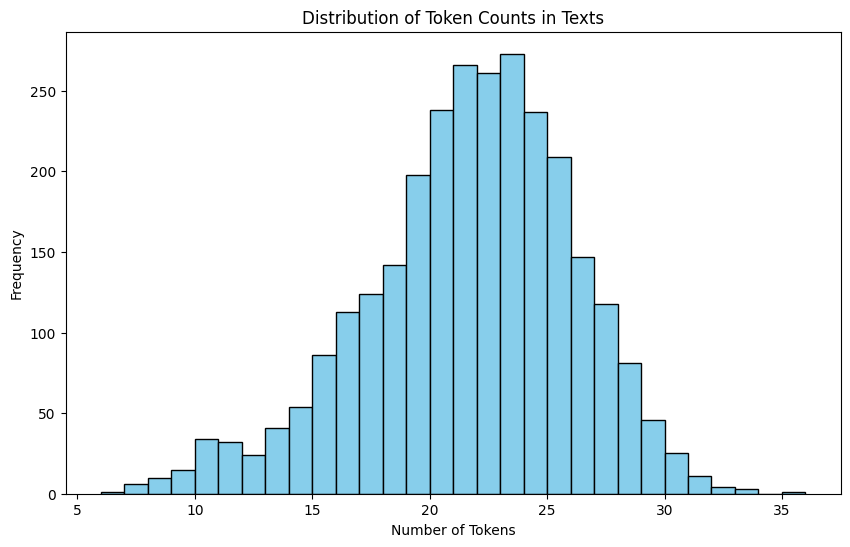

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

token_counts = train_df['text'].apply(lambda x: len(tokenizer(x, return_tensors="pt")["input_ids"][0]))

# 토큰 개수 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Token Counts in Texts")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

In [116]:
train_df['text'][53]

'코로나 r대^등교)모습'

In [11]:
train_df

,ID,text,target,ratio
0,ynat-v1_train_00000,정i 파1 미사z KT 이용기간 2e 단 Q분종U2보,4,1.0
1,ynat-v1_train_00001,K찰국DLwo 로L3한N 회장 2 T0송,3,1.0
2,ynat-v1_train_00002,m 김정 자주통일 새r열1나가야1보,2,1.0
3,ynat-v1_train_00004,pI美대선I앞두고 R2fr단 발 비해 감시 강화,6,0.952381
4,ynat-v1_train_00010,oi 매력 R모h츠a열w3약 l·주가 고Q진,5,0.95
...,...,...,...,...
1509,ynat-v1_train_02788,남원소식 춘X학단장Rn 모집,0,1.0
1510,ynat-v1_train_02789,이총리세4 H직 완fl지 못해E할 일 꽤남아,2,1.0
1511,ynat-v1_train_02790,프로농구 개막 헤인즈의 1만점·양동근의 900스틸,3,0.956522
1512,ynat-v1_train_02792,높XE율BO Q선수 몸값 상승 CAO,1,1.0


In [11]:
train_df

,ID,text,target,ratio
0,ynat-v1_train_00000,텔레그램과 디스코드 등 메신저 서비스가 2시간 동안 전 세계적으로 서비스 중단,4,1.0
1,ynat-v1_train_00001,텔레그램과 디스코드 등 메신저 서비스가 2시간 동안 전 세계적으로 서비스 중단,3,1.0
2,ynat-v1_train_00002,텔레그램과 디스코드 등 메신저 서비스가 2시간 동안 접속 불가,2,1.0
3,ynat-v1_train_00004,텔레그램의 D라이브러리를 사용하는 아시아 국가 2개에서 2시간 동안 서비스가 중단되다,6,0.952381
4,ynat-v1_train_00010,텔레그램의 D라이브러리를 사용하는 2억명 이상의 사용자가 2시간 동안 서비스 이용이...,5,0.95
...,...,...,...,...
1509,ynat-v1_train_02788,남원소식 춘X학단장Rn 모집,0,1.0
1510,ynat-v1_train_02789,이총리세4 H직 완fl지 못해E할 일 꽤남아,2,1.0
1511,ynat-v1_train_02790,프로농구 개막 헤인즈의 1만점·양동근의 900스틸,3,0.956522
1512,ynat-v1_train_02792,높XE율BO Q선수 몸값 상승 CAO,1,1.0


In [14]:
a[1]

ID                                ynat-v1_train_00021
text      텔레그램과 디스코드 등 메신저 서비스가 2시간 동안 전 세계적으로 서비스 중단
target                                              1
ratio                                        0.958333
Name: 7, dtype: object

In [15]:
for i, (index, row) in enumerate(train_df.iterrows()):
    ID = row['ID']
    text = row['text']
    prompt = (
        "Noisy headline: " + text + "To do: Rewrite the above headline in Korean as a clear and natural-sounding full newspaper headline. The headline should convey the main idea and implicitly suggest its category, such as economy, society, politics, or world. Do not provide only the category label like '(스포츠)' or '(경제)'. Instead, write a full and meaningful sentence that serves as a complete headline. Finally, only provide the final headline text without any notes like explanations, meta information, or additional comments. Enclose the final headline text within <span></span> tags to facilitate later processing."
    )
    
    answer = generate_answer(prompt)
    if '<span>' in answer and '</span>' in answer:
        train_df.at[index, 'text'] = answer.split('<span>')[-1].split('</span>')[0]
    else:
        train_df.at[index, 'text'] = answer
    

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


KT, 이용자 2억 명 돌파... 정의원 "5G 혁명" 주도한다


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


북한 김정은, 남북통일을 위한 새로운 방안 제시한다


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


주가가 급등한 증권시장에서 투자자들이 이익을 본다


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [169]:
# CSV 파일로 저장
train_df2.to_csv("train_df2.csv", index=False, encoding='utf-8-sig')

In [171]:
#특수문자 제거
train_df3 = train_df2.copy()
# 특수문자 제거
train_df3['text'] = train_df3['text'].apply(lambda x: re.sub(r'[^가-힣a-zA-Z0-9\s]', '', x))

# 결과 확인
train_df3

,ID,text,target,ratio
0,ynat-v1_train_00000,KT SKT LGU 3대 통신사 이용료 인상 정기요금제로 전환 이용자들 불편 예고,4,0.48
1,ynat-v1_train_00001,대한민국 최초의 여성 국회의장으로 선출된 이명박 전 대통령의 딸 이희수 국회의원이 ...,3,0.304348
2,ynat-v1_train_00002,북한 남북통일을 위한 자주통일의 길을 열어야 한다,2,0.631579
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통시장은 불법 보조금 얼룩,5,0.826087
4,ynat-v1_train_00004,미국 대선 앞두고 선거법 위,6,0.565217
...,...,...,...,...
2795,ynat-v1_train_02795,트럼프 폭스뉴스 앵커들 충성도 점수매겨10점만점에 12점도,6,0.821429
2796,ynat-v1_train_02796,삼성 갤럭시S9 정식 출시 첫 주말 이통시장 잠잠,2,0.9
2797,ynat-v1_train_02797,텔레그램 한드 등 아시아서 2시간 동안 서비스 중단 카카오T 구글 메신저도 영향을 받다,4,0.5
2798,ynat-v1_train_02798,인터뷰 류현진 친구에게 안타 맞는 것 싫어해승부는 냉정,1,0.958333


In [172]:
# ratio 열 제거
train_df3 = train_df2.drop(columns=['ratio'])

# target 열을 정수형으로 변환
train_df3['target'] = train_df3['target'].astype(int)
# CSV 파일로 저장
train_df3.to_csv("train_df3.csv", index=False, encoding='utf-8-sig')

In [144]:
short_texts = train_df2[train_df2['text'].str.len() <= 10][['ID', 'text']]

In [146]:
short_texts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 46 to 2792
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      341 non-null    object
 1   text    341 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [167]:
train_df2['text'][48]

'Noisy headline: Vq)Z!\\자o구 김정Re트로1$보니C.도l모르".Qk이To do: Rewrite the above headline in Korean as a clear and natural-sounding full newspaper headline. The headline should convey the main idea and implicitly suggest its category, such as economy, society, politics, or world. Do not provide only the category label like \'(스포츠)\' or \'(경제)\'. Instead, write a full and meaningful sentence that serves as a complete headline. Finally, only provide the final headline text without any notes like explanations, meta information, or additional '

In [168]:
# 모델을 사용하여 새로운 text를 생성하고 대치
for _, row in short_texts.iterrows():
    id_value = row['ID']
    
    # train_df에서 원래 text 가져오기
    original_text = train_df.loc[train_df['ID'] == id_value, 'text'].values[0]

    # 새로운 프롬프트 생성
    prompt = (
        "Noisy headline: " + original_text + "To do: Rewrite the above headline in Korean as a clear and natural-sounding full newspaper headline. The headline should convey the main idea and implicitly suggest its category, such as economy, society, politics, or world. Do not provide only the category label like '(스포츠)' or '(경제)'. Instead, write a full and meaningful sentence that serves as a complete headline. Finally, only provide the final headline text without any notes like explanations, meta information, or additional comments."
    )   

    # 모델을 사용하여 새 headline 생성
    new_text = generate_answer(prompt)
    
    # train_df2에 새로운 text로 대치
    train_df2.loc[train_df2['ID'] == id_value, 'text'] = new_text.split('comments.assistant')[1].split('\n\n')[1]
    print(train_df2.loc[train_df2['ID'] == id_value, 'text'])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


46    4대 은행 중 3곳이 연속 5년 연속 적자 기록
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


48    김정은 북한 지도자, 경제개혁에 대한 전망 밝힌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


54    LG V40이 5개 카메라로 촬영한 사진, 즐거운 순간을 포착했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


57    문대통령, 김정은 북한 지도자와 7월 27일까지 정상회담 마무리하겠다고 밝혔다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


69    D1리그 T선수들의 활약이 바른 경기 운영에 큰 도움이 된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


77    아마존 CEO 베조스, 미국 상원에서 증언에 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


83    유영준 대표, 왕웨이 회장과 협력에 주의를 기울여야 한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


89    국민의 의지와 정부의 정책이 맞물려가는 시대, 경제 성장의 새로운 방향을 찾다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


91    한방 의료시설의 부실이 드러나면서부터 시작된 의료법 개정 논란이 본격화되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


105    한국관광공사와 업무 협약 체결, 관광산업 성장 기대
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


107    프랑스 마르세이유에서 열린 G7 정상회담에서 주요 쟁점은 이란과 북한에 대한 대응이었다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


115    울산MBC 사장 최병륜, 사임의사를 밝혀
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


116    캐피탈, 한국전력 FTV4컵 4강 진출에 성공한 현대건설을 2-1로 격파
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


120    박정의 정부가 북한을 무시하는 균형을 잃어버렸다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


132    올해 이대생이 수상한 '소음원'은 개가 멀리 짖는 소리가 아니라 소가 멀리 짖는 소...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


147    도자기 작품이 인기 있는 전통시장에서 판매량이 크게 증가하는 이유는 무엇인가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


152    북한 김정은, 러시아 방문 중 러시아 대통령과 면담
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


161    온라인 교육 플랫폼 6곳, S9XOC카cO트 6개 강의 공동 개설
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


172    미네소타 주에서 열린 하키 경기에서 충돌로 2명 부상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


177    명동의 오페라 하우스, 한류의 즐거움을 전해온다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


187    반기문 전 유엔 사무총장 부부, 2년 전 약속 지키고 초대 만찬 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


191    다저스, 3년 연속 월드 시리즈 진출 가능성 높지만 우승은 쉽지 않다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


199    현대차그룹, 자회사 현대차증권에 300억원 투자한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


200    갤럭시 S7 O3E부터 8월 환불 시작, 1만 원 이상 환불금 지급
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


202    TV 시청률 3년 만에 역대 최고 기록 달성...4월 3일 밤 9시 방송 '6면 속...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


204    유럽의 대형 은행들이 한국의 대형 은행들과 손잡아 공동으로 자금을 조달할 방안을 논...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


206    국민의힘, 친정부 시설격차 문제 해결을 위한 특별위원회 구성한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


216    미국 X사, 한국 반도체 업계에 1조 5천억 원 규모 투자 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


217    올해도 2명 이상 한국 선수 출전 가능해 보인다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


218    류현진, 개막 첫날 1:2로 패해 불안한 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


219    브라질이 3라운드에서 한국을 꺾고 월드컵 8강 진출
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


221    오늘 밤 0시 대설주의보 발효, 6개 시도에 눈길
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


225    박철성이 전날 방송에서 말한 것과는 달리, 실제로 쥐가 온몸에 나타났습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


228    세계 경제위기 대비 위한 금융안정성 강화 방안 논의 돌입
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


238    영국과 한국이 협력해 만든 신기술, 세계시장서 큰 성공을 거두다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


241    모바일 보안 기술 50만 번의 공격을 견뎌내는 성과를 거두다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


255    봄비에 젖은 꽃들이 피어나기 시작했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


256    핑크퐁이 TV 앱으로 돌아온다, 교육 콘텐츠로 새로운 도전을 시작한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


257    국회는 장애인 인권을 위한 법률 개정안을 통과시켰다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


261    M박 회장, 혁신k 출자로 7위 기업으로 도약한 배경과 효과
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


268    Y-57E형 항공기 엔진 결함으로 인한 비행 중지 결정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


296    송승준 WBC 한국 대표팀 감독, 1년 만에 다시 부임
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


298    리자드의 인격적 능력은 성공의 열쇠다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


303    아랍권 반정부 운동의 여파로 정상급 국제회의가 무산된 가운데 이란의 위협으로 인한 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


339    소상공인들에 대한 금융지원이 부족한 데다 신용등급이 낮은 소상공인들이 어려움을 겪고...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


341    융커들의 삶이 어려워지자 '중산층'의 정체성이 흔들리고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


346    긴급재난지원금 2천782억원 중 2%가 기부금으로 사용
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


350    레이스에서 50점대 기록한 휴그턴, NBA 진출 첫 승을 거두다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


356    조코비치, 김정은과 만남...북한 리더와의 첫 대면
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


364    김범호 6년 만에 첫 우승, LPGA 투어 토너먼트에서 우수한 성적을 거두다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


368    삼성전자, 1분기 영업이익 2조 1천억원 돌파... 전년比 52% 성장
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


376    YG가 주축이 된 K-POP 그룹이 미국에서 첫 번째 콘서트를 열었습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


379    이재명 전 대표의혹, 민간인 인권 침해 의혹이 또다시 제기되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


381    청소년 6명이 결국 'Y'로 답한 사안은 수용된가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


385    서울대에서 내년 1월 개최하는 국제기구 강습회, 참가자 모집 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


392    오스트리아에서 에어비앤비 시범 운영 중단, 호스트 자격 없는 숙소 문제로
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


393    핵재처리·소듐가속기 건설 지속 논란 속에 정부가 추진하는 방사성폐기물 관리법 개정안...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


405    세계무역기구(WTO) 재협상 방안이 고질적인 난관에 봉착했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


421    북한 독립운동 역사 공유, 남북 간의 역사 교육 협력 가까워질까
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


432    8대 도쿄 마라톤에서 한국 선수가 우승했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


434    루카쿠, 에버턴 FC 역사상 최다 득점자로 등극...7년간 186골을 터뜨렸다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


441    세계언론인상 수상자들 "자유언론의 중요성 강조"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


450    한화 이글스, 뉴욕 메츠와 8월 16일 경기로 맞대결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


454    도시와 농촌 간의 교통난 해소 위해 도로 확장 계획 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


510    LG와 SK가 경쟁한 3조원대 화웨이 5G 장비 매각 종결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


512    국회사무처, 미국 추츠 대학교와 7개 시립 대학교와 MOU 체결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


514    인천서 오미크론 변이 확진자 발생, 지역사회 감염 우려 높아
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


515    서훈 국방부 장관 "대북 군사 작전을 위한 사전 준비를 마쳤다"고 밝혔다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


524    유럽축구의 강호 리그 아란에서 한국 클럽이 15년 만에 패배를 당했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


547    국내 주요 농산물 수출지인 러시아의 경제위기 가속, 농산물 수출에 큰 타격을 입는다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


548    미국, 사드 배치에 대한 한국의 반대에 대해 우려를 표명한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


554    정부가 추진하는 VC 차관 확대는 효과를 거두나?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


557    세계 경제위기 이후 2년 만에 미국 주식시장 크게 흔들린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


581    영하 14도까지 추위가 내리쬐는 겨울철 기상 예보, 평년보다 낮은 기온 예상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


582    유럽축구연맹(UEFA), 파리 생제르맹의 재정규제 위반 여부 조사 착수
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


586    오늘자 K리그1 3위 오산 FC, 4위 반도유업 FC와의 경기를 앞두고 반등의 기세...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


591    시진핑 총리, 서머싯 민생 정책에 호의적 반응을 보인다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


593    국회, 이달 내까지 김부선 의원 불신임안 처리하지 못할 가능성 높아져
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


595    남수단에서 폭동이 발생해 11명 사망, 수천명이 피난
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


617    북한, 설 연휴 기간 3일간 휴무...2003년부터 사흘 연휴로 변경
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


632    올림픽 마라톤 참가 자격을 놓고 북한 선수단의 행보가 관심을 끌고 있다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


635    한샘, 아동복지 기금에 9천만 원 기부
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


636    홍영철 이사장, 대한체육회 임기 종료 후 첫 공식 행사서 경례 받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


646    삼성 반도체, 미국 텍사스에 2조원 규모의 새로운 공장을 건설한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


648    신반포역 주변 부동산 가격 급등... 역세권의 가치
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


649    세계 스키점프 선수권 대회에서 한국 선수가 금메달을 획득했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


667    변희재 논객, 검찰의 수사 의혹에 대한 반박과 진실찾기 운동을 시작합니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


670    KT, SKT, LGU+ 등 통신사 5개가 사우디아라비아 공격에 대한 보상금 지불 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


675    삼성카드, P2PE 시스템 보안 취약점 발견...고객 정보 유출 우려
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


691    메시·호날두, UEFA 올해의 팀에 선정...영국 EPL 선수는 없다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


693    3월 2일 세계 경제를 뒤흔든 대형 은행 위기
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


694    주말 야외활동에 방해가 될 수 있는 오염이 심한 공기와 물 오염이 우려된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


696    국민의힘, 2024년 총선 전략 발표... "대통합" 강조하며 野와 경쟁한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


701    고용부, 4월 고용률 3.4%로 1년 연속 하락
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


714    IBF증권거래소가 부실기업 6개에 대한 상장정지 조치를 내렸다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


721    朴대통령이 입장했을 때 5년 만에 다시 오는 국회 4차례 수의권장안 통과
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


722    홍콩의 T72제보가 1억5천만 달러를 넘는 불법거래를 폭로, 9월 금융거래 규제 강...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


749    류현진, 베이징 올림픽에서 포수 마틴과 함께한 한국 야구의 첫 금메달
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


752    5G 기술이 세계 올림픽 대회에 도입되나...서부 미국까지 8Tc 단위 신호가 도달...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


755    LG 트윈스, SK 와이번스와의 3차전에서 더 생생한 경기가 펼쳐질 전망
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


765    삼성 갤럭시 S9 한정판 'Q' 모델 5천원 할인 판매 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


769    원스토어 앱에서 판매되는 콘텐츠 유통 수수료가 크게 낮아진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


775    용9, 최고위원 출마 선언...난민계 당 지지자들 관심 집중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


782    미국, 중국 내정 간의 갈등을 부추기는 행위에 강하게 반대한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


783    북미 무역전쟁의 여파로 미국 경제가 치열한 타격을 받고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


786    라건위기 속 현대모비스, 대성실업과 합병 추진
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


787    역전 터미널에 관광객이 몰려 공항보다 더 붐비는 현상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


794    삼성전자, 신형 갤럭시 Z 플립 7 출시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


806    36일째 병원 입원 중인 이씨, 건강 악화로 의사들에 의해 긴급 입원
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


812    세계 식량 시장 혼란에 따른 국내 생산물 가격 급등
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


820    청와대, 전자거래법 개정안 폐지 결의
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


821    19년 하반기 위기 대비 GR 복지 대안 나온다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


831    U19 대표팀, 스코틀랜드와의 경기서 12-0 대패
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


835    4월 3일까지 4%대 점유율을 기록한 '5j픽R' 유료방, 4월 4일 이후 점유율 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


849    북한 U-17 축구대표팀, 아시아 최초로 세계선수권 진출 성공
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


850    월스트리트 저널, 갤럭시 폴드 판매량 5만7000대에 불과하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


851    박은진과 정대영, 아시아경제상 수상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


865    북한, 올해 핵실험 "화해" 가능성 낮다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


869    해수욕장에서 여름철 피서인파가 몰려들자 코로나19 예방을 위한 사회적 거리두기 지침...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


872    대통령 가족 의혹으로 파문이 이는PD가 방송사와의 계약을 해지한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


879    세계 경제 포럼 6차례 모인 곳, 한국과 일본이 공동 개최한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


893    미술계의 새로운 흐름, 전 세계 예술가들의 참여로 화제
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


922    세계 경제위기 이후 10년 만에 가장 큰 하락을 기록한 한국株시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


923    전국 10개 도시에서 천여 명의 시민이 참여한 대규모 시위가 전국적으로 확산되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


946    지구환경을 위한 국제회의에서 한국이 제안한 'F' 전환 방안이 논란의 중심에
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


957    SK텔레콤, 싱가포르 통신사 싱텔과 함께 e스포츠 사업 협력한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


961    4천명이 넘는 코로나19 환자 치료 위해 정부가 대규모 병원 확보한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


962    박원순 교육부 장관, 교육부와 학교 간 소통 강화 필요성 제기
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


963    8일 4시께 8구역 장거리 버스 1대가 불시착, 승객 30여 명이 탈출했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


979    외국인들이 좋아하는 한국 제품은 어디인가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


982    SK텔레콤, 갤럭시A80 출시... 회전 카메라로 화제를 모은 스마트폰
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


983    북한 핵문제와 무역·투자 협력 등 주요 쟁점 논의한 정상회담 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


984    지소연·이하은, X월 여자 아시안컵 국가대표로 선정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


987    새누리당과 자유한국당, 지방선거 출마 의원 촉구 이어져
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


992    내년 2월부터 주택연금 수령액 3% 줄어든다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1000    혁신형 중진들, 국회 내부 개혁을 위한 대토론회 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1007    거제시 동계철도 정비로 인한 출입제한 3일 재개
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1035    아시아선수권대회 4위에도 자신감 넘치는 한국 선수들, 월드 챔피언십 도전을 앞두고
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1037    저임금 근로자들 노력 끝에 임금 인상 쟁취, 사용자들의 삭감 요구는 물거품
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1041    8원에 7천만㎡ 규모 공원 조성 충남 예산 부족 우려
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1044    A성 "자금난"에 빠진 자영업자들, 정부 지원이 실현되나?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1068    북한, 남한 방치 공세에 대한 대응으로 대남 방송·언론 공격 강화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1078    장의가 체육관으로 바뀐 자리, 향후 7년 동안 사용할 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1094    김학민 5점대 8득점, KB손해보험 컵대회 결승서 KB스타즈 꺾고 우승
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1098    주택금융 4년간 개발 협력, 주택 시장 안정에 기여할까
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1102    가빈, 산체스, 이적료 9억 달러에 합의... 맨체스터 유나이티드와 공식 계약
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1106    5시 경시장 급등세...HxF "이트론" 주가 10% 넘게 올랐다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1113    국내 프로야구 경기 수는 4배로 증가한 반면 관중 수는 3배로 늘지 못했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1117    아베 총리, 내각 총리대신 교체 후 첫 회의에 참석해 부상 관련 논란에 대응한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1125    SKT 010 가격 인상에 대한 정부의 대응이 문제되나
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1146    정부, 4월 한반도 위협 가능성 높여... 북한의 군사 행동에 주의 경고
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1202    대구외고 통학버스 5기사 확진...29명 입원
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1218    10년 전 곰팡이 논란이 일었던 한 식품회사의 제품이 다시 한 번 논란의 중심에 오르다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1237    LG 하이텍 감일지구 Q5공동주택 필지 매각
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1238    바르셀로나, 4년 연속 국왕컵 16강 탈락...4번째 패배
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1257    5일간의 대규모 시위 이후 1명 사망, 5명 부상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1258    포스텍과 ICT로보틱스, 6트 팩토리 사설공장에 H-HAND II를 도입한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1259    유학자들 충격...영국 유학비 9년 6억원대 달해 한국 유학 포기하는 이들이 늘어난다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1260    6년 만에 제1당 지위 잃은 중도당, 선거 참패로 당권 주도권 잃다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1263    지역 언론 5곳, 오마이뉴스에 지역 뉴스 제공 요청
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1264    전 세계적인 부동산 시장 위기와 한국의 대응
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1296    육식동물 아빠 5G가 되다, 호기심은 어디로?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1315    박대통령 탄핵소추안 가결, 국회가 박대통령 탄핵을 위한 절차를 시작한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1321    박대통령이 북미정상회담 결렬 후 첫 다자회담을 개최, 중국과 접촉할지 관심
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1324    AT&T가 지구위성 네트워크 사업에 10억 달러를 투자한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1333    5년 전 시작한 거래량 2조원 돌파, 코스피 5주년 기념행사 성료
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1347    베트남과 한국, 8년만에 다시 수교한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1364    198개국에서 최대 1천만 명이 실업에 빠진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1384    북한, CBM용 잠수함엔진 시험에 추가 도발로 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1394    부산 아티 펜스 스타디움, 2024년 개장 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1410    삼성전자, 노트북 판매량 1위 자리 내달리다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1411    저금리 정책으로 부자들보다 일반인에게 더 큰 혜택이 돌아가는가?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1420    위조 방지를 위한 필름에 입김 불면증 치료 색상 변화를 감지하는 기술 개발
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1421    9인치가 넘는 배우의 성형수술 의혹에 대한 진실은?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1426    국내 혈관 질환 환자 1인 3명이 약물 복용으로 사망 위험을 높여
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1442    세계의 주요 제조업자들이 공급망 위험을 줄이기 위해 대응하고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1444    SK텔레콤, 갤럭시 A8 스타 단독 출시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1449    2020년 대선에서 제1야당이 된 자유한국당, 5년 만에 역사 속으로
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1464    문학주간 행사, 시·문인들이 함께 즐긴다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1468    세계 금융시장의 혼란이 가라앉은 가운데 한국 주식시장도 전일 대비 1.5% 상승했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1470    이탈리아와 독일, 난민 구조선에 대한 규정 위반 의혹
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1476    국내 전력난에 대한 우려가 커지자 한국전력의 수요관리가 실패한 국전의 전력 수급난 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1511    세계 주요국가의 경제 성장률 비교, 한국의 실질 성장률은 2.8%로 가장 낮다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1513    애플 시계가 T1 시계와 경쟁에 밀려 판매량이 감소하는 가운데, 스마트워치 시장은 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1531    일본 경제위기 가속, 한국 경제에 미치는 영향은?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1535    미국 경기권에서 양도료 급증... 양가 공급과잉 탓
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1540    이달 91일부터 3대 이동수단 이용료 인상, 교통비 부담 가중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1560    발롱도르 수상자로 선정된 오르투고, 발롱도르 8명이 발표되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1563    안랩 불성실 공시로 증권거래위원회 징계
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1586    대신증권, 아시아 7개국 신주시장 지수에 포함될 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1587    세계에서 1만 7000명 이상이 실종된 것으로 추정되며, 그 중 4만 명이 지난 5...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1597    케이스 투자 거부로 세종특별자치시 주식회사 폐업 위기
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1602    광주에서 열리는 수영 대회, 홍보 행사 열어
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1611    류동 선수, 올해도 메이저리그에서 활약할 것
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1613    이재명 전 대표, 당내 징계 첫 단계로 MC 위반 혐의로 징계위원회에 회부
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1623    강철재산 4m 규모의 부실사건이 드러나다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1630    아프리카 앙골라에서 외국인에게 부과된 징수금을 받는 권리 폐지 법안이 통과되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1632    임아국, 한국에서 열린 Hケット몬 Q1 결승전에서 우승했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1647    포르투갈이 1-0으로 이긴 한국, FIFA 월드컵 16강 진출 실패
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1658    L데株, 구나사와 합병 발표... 1조200억원 규모
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1663    정부, 3년 연속 학자금 대출 한도 인상 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1664    KB, 제2금융권 중 가장 큰 규모의 자본잠식 위기
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1669    안종범·崔炳수 마사지 논란, 단골손님 9명이 명백한 오보를 밝혀냈다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1671    국내 자동차 판매량 1위는 현대차, 8년 연속 기록
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1676    애플뮤직, 9월 22일부터 월간 구독제 '애플 뮤직 1' 도입
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1684    청와대가 발표한 신제도에도 불구하고 노동자들은 여전히 고용노동부의 제재를 피하고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1689    오늘부터 0시 5분부터 전국 전기료 인상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1701    세계 최고의 스마트폰 제조사로 등극한 한국 기업
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1707    SK텔레콤, 미래 고객을 잡기 위한 전략 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1723    1분기 경제성장률 전망이 강조되면서 경기 회복에 대한 기대가 높아진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1783    북한이 올해 9월에 열리는 남북정상회담에 북한 최고위급 대표단을 파견할 가능성이 높...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1787    남북정상이 만찬을 함께하는 데 성공한 첫 사례가 열린다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1797    8일째 지속되는 항공사 노조 파업, 여행객들에 큰 혼란을
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1816    국민은행이 금리 인상할 가능성이 높아졌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1818    강원도 제비축구대회 내달 개막, 대회명칭과 개최지 변경
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1823    SK그룹 이&북 본사 사장, 방한 후 페북·SKB 7대란에 대한 입장 발표 미흡한 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1824    폭염이 찾아올 때는 역시 물을 많이 마시고 식혜를 많이 마실 것
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1828    2025년까지 1인당 스마트폰 데이터 사용량 6GB로 급증할 전망
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1834    국내 랜섬 피해 신고가 2건 더 늘어난다, 총 4건이 발생한 것으로 나타났다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1872    강풍이 몰아치는 오늘 저녁부터 내일까지 전국 곳곳에 폭우가 내리다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1879    북한, 신년사에서 러시아와 중국을 강조... 강력한 외교력 발휘
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1882    48명 사망, 희생자 0명은 어린이... 간호사 부족으로 인한 의료난이 속출하는 미국
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1888    금융위기 여파로 세계 경제가 혼란에 빠진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1892    국제금융시장 불안이 고조되며 한국 경제에 미치는 영향에 대한 정부의 대책 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1894    북한 핵실험 여부에 대한 미국과 중국의 통신 불일치로 국제 사회 혼란
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1897    L9이노텍, 호봉면에 대규모 공장 건설 계획 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1898    LG NC소사, 4년 연속 4위...봉승2위는 SK
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1907    세계 경제위기 이후 10년 만에 미국이 또다시 큰 부채로 빠지다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1908    32개국이 참여한 국제회의에서 의무를 강조하는 성명이 발표되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1911    한국 U-19 축구대표팀, 프랑스에 14-0 대패... 툴롱컵 1차전 무너지다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1917    인제군 자작4저지 숲 입산 통제 시작, 15일부터 2개 구역으로 나눠 운영
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1941    러시아-일본 영토 분쟁이 한층 더 심화되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1949    SK텔레콤이 주도하는 대형 주택용 ICT 사업이 본격 시작된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1954    미국 4선 의원 선거 첫 토론에서 힐러리 클린턴이 우세한 판세를 보였다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1955    GS칼텍스, 이스라엘의 UTMIA와 합병... 글로벌 석유화학 시장 강화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1956    1일 만에 초미세먼지 '보호대상'으로 전환... 정부, 대책 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1962    2018년 여름 휴가철, 지친 마음을 풀어내는 링 코스 여행
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1970    미세먼지 주의보 발령, 여름 휴가철 첫날부터 전국 곳곳서
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1986    3종시 공공도서관 10곳에서 책 빌리기 쉬워진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1988    4년간의 전정지와 중징계를 받은 A 경 우승자, 복귀 첫 경기서 2위에 그치다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1994    미세먼지 오염이 국민 건강에 미치는 영향에 대한 우려가 커지고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1999    IBM, 2024년 초부터 1분기 매출이 감소할 것으로 예상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2001    미세먼지와 오존이 함께한 여름의 건강 위협, 노동자들은 더 취약하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2011    미국서 8%대 실업률, 5년 만에 최저치 기록
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2013    세계 경제위기 이후 10년 만에 미국이 또다시 큰 부채로 빠지다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2020    미·중·러 정상이 3일 만에 첫 회담을 열어 0선 이하로 낮춘 북한의 미사일 도발에...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2032    부산 사하구 모든 학교 2일간 온라인 수업으로 전환... 확진자 속출로
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2033    넥스 브리검, 연속 7년째 우승하며 NBA 역사상 가장 긴 우승기록을 달성하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2035    대구경북과학기술원 총장 임명 논란, 구성원 단합으로 위기를 넘어
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2037    정부가 발표한 2023년 경제성장률 예상률 3.1%는 1년 전보다 0.3% 낮다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2038    삼성전자, 5G 스마트폰 '갤럭시 S22' 출시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2046    세계서 가장 많은 책을 읽는 나라가 된 한국, 이제는 책 읽는 습관을 어떻게 유지할...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2067    펭수 대통령, UAE와의 협력 강화 위해 3일 UAE 방문
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2070    만경대교 개통 20년, 교통난 해소 효과는?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2072    법원에서 대법원장 후보자 사진 전시 논란, 법원 내 분위기 어지럽다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2076    연구실 내 산업 기술 개발을 위한 지원이 활발해지자 연구실 내 산업화 추진이 가속화된다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2078    조국 장관 사임 여론이 분분한 국회 토론이 시작되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2085    류현진, 메이저 리그 첫 올스타전 선발 투수 선정... 두 번째 팀 선발에도 선정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2086    구글 AI 진단은 의사와 함께 의료진단을 못한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2090    삼성전자, 베트남에 6만대 이상 갤럭시폰 생산시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2092    홍콩의 정치 불안이 세계 경제에 미치는 영향은?
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2097    박혜정, 4년 연속 MVP 수상...여자프로농구 역사상 최초
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2115    SK텔레콤, 5G 네트워크 속도 세계 1위 달성...이번달 50개국에서 서비스 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2124    합성영 성폭력 혐의로 검찰 조사 받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2126    국회 예산결산심의위원회, 정부 예산안 통과시킨다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2131    박지성, 2위 팀에 6골을 넣고 4골을 어시스트하는 기염을 토해
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2141    대한항공, 노조와의 임금 협상 결렬... 노조, 파업 선언
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2145    세계무역기구(WTO) 대북 제재로 한국의 수출이 크게 감소한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2168    더민주·정의당, 대난민난민 문제 해결을 위한 연대 협의회 구성
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2198    독립선상에서 140년 전 쓴 독립선 5문이 발견되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2202    세계 경제위기 가속화, 5년 전과 같은 위기상황이 돌아왔다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2203    세브란스병원, 이희진 의사 불법수술 의혹 수사 받다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2215    국민의힘 경남당원대회서 2일간 8천명이 참석, 리더십 경쟁 본격화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2223    8월 국내 자동차 판매량 전년比 17.6% 감소
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2226    이석수 청와대 대선 후보 표 접수...8대 대통령으로 나선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2229    A강서구의 한 아파트에서 3억 원대 물건이 사라진 사건이 발생했습니다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2246    8대국가 8개 팀이 참가한 시라리 국제 농구 대회에서 한국이 금메달을 차지했다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2287    미국 증시 7% 급락, 세계 경제 불확실성 가중
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2289    KT, 정보보안 기업 4곳과 협력 MOU 체결
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2290    교대생들 위한 기술 교육센터가 성황리에 개장했습니다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2293    셀리피온 20억원대 손실... 작년 매출 감소
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2296    빙상경기 최강자로 등극한 이승훈, 세계 선수권 대회서 금메달을 목표로 한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2297    서울시, 세계 프레그라운드 게임 대회서 3위 달성
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2299    LG전자 신제품 LG X6, 3대 카메라로 사진 찍는 즐거움을 더하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2301    메츠 신디 오벌린, 9이닝 무실점 완봉승으로 MVP 수상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2312    박근혜 대통령이 언론인들과 만난다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2315    반려동물의 반려를 잃은 사람들, 2년 안에 반려동물 재가입 절차가 개선될 예정
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2324    ATM 출금기록을 위조한 금융사고가 발생해 수많은 고객의 계좌가 위험에 처해
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2325    맨유, EFL컵 우승으로 20년 만의 대회 정복
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2327    국회, 5박 4일 국정감사 일정 발표...내년 예산 심의 시작
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2333    북한 김정은이 서울로 오는 통일부 장관을 맞이한 예단
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2335    김기남 상가서 6개 가게 화재, 1명 사망 1명 부상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2357    코스피가 전일 대비 1.5% 하락하며 마감했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2358    현대모비스, 존슨·쇼터 tn선수 영입 완료... 프로농구 포스트시즌 본격화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2376    제조업 경기 전망 지수 최악 수준으로 급락, 경기 둔화 우려 높아
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2402    김학준 경영자문위원, 경영자문위원회 위원장 임명
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2413    정부가 추진하는 노후 공항 개조 사업에 대한 민간투자자들의 우려가 높아지고 있다.
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2420    한진그룹 계열사 한진칼, 1천억원 규모의 단기대출 문제로 경영난에 빠져
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2447    qT 게임의 3D 그래픽 렌즈 기술, 개발 속도 제한에 부딪힌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2449    "국내 최초의 50원짜리 4년금리 보증상품 출시, 금융권 1위 기업이 선도한다"
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2469    5G 네트워크 기술이 적용된 신제품 '5GX 부기' 출시
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2477    김관영 의원, 국회 의원 연임 기간 연장안 발의
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2478    오늘도 정선·의성 등지에서 9.1도 이상의 추위, 서울 5도도 넘어
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2482    하반기 증시 성장률과 유가 예상세미나 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2493    6년 만에 최고치에 도달한 주식시장, 외국인 투자자도 참여한 가운데 8년 연속 상승세
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2501    금융위기 이후 12년 만에 미국 주식시장에서 큰 폭락
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2503    맨시티, 역대 최다골로 프리미어리그 28년 연속 우승
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2528    5G 네트워크가 전국 1만 2천 개 이상의 지역에 도입되다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2566    세계 베스트셀러 목록에서 '세이 곰돌이'가 1위로 오르다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2568    손흥민, 토트넘이 7-0 대승으로 7위로 올라선다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2581    캡틴 America와 랑크9스트 H8이 산에 오르다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2582    유엔과 국제기구가 주도하는 HRUTS 협상이 무산될 우려에 따라 세계 경제에 미칠 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2589    나비와 천마가 블랙 자켓에 도전한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2601    SK그룹, IBM과 함께 인공지능 브랜드 '에이브아이' 출범
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2602    박 대통령도 "YO와 숨가쁘다"며 2·28 핵심 외신전문가 초청
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2606    7월 실업률 4.1%...국내 경제 여전히 부진세력
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2608    한국인 뇌 크기 세계 1위, 지능도 세계 최고
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2609    미국 국무부, 북미 7자 회의에 대한 전반적인 평가 발표
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2615    대통령이 주최한 대통합 표창식에서 대우그룹이 수상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2618    괴롭힘을 당한 학생들에 대한 법적 처벌 강화 방안 논의
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2630    대구지하철 노선 5호선 운행 중단, 5일간 정상화 불가
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2645    미국이 북한 6차 핵실험에 강력히 반발, 유엔 안전 보장 이사회 긴급 회의 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2656    올해 1조원대 수출 목표는 달성할까... 작년 수출 증가율 6.2%
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2666    예멘 정부와 반정부당 대표, 긴급 대화 개최
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2669    8기 BBWF, 한국과 미국이 대결한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2682    박9호 사장, 드림자동차 경영권 인수에 성공
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2683    KT, SKT, LGU+, 세 대 통신사와 협력한 오버더클라우드 업체가 3년 만에 ...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2689    김태호 전 차관이 출옥해 우려가 커진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2708    북한, 기동훈련에 참가한 러시아 군함이 참관한 기동전술 훈련을 성공적으로 마무리했다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2709    과학기술로 미세먼지 해결한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2722    문화예술부 장관이 발표한 '창작지원 5시스템' 개발 완료, 작가·예술가 지원 강화
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2731    남중미 4개국 군사 충돌 가능성 높아져... 대립의 틀을 뚫는 대화 필요하다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2732    7월에도 8월에도 물가가 떨어지지 않는다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2747    양키스, ALCS서 2연승으로 결승행에 한발짝 더 가까워진다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2763    손흥민, 12월 31일까지 시즌 최다골 기록에 근접한다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2774    지구촌 주요 도로망 개선에 따른 교통 혼잡 예상
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2779    클럽 스마트G, MV 'x'로 대중의 관심을 끌다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2782    이재명·이낙연·안철수·심상정 등 4인 체제로 출마할 것으로 보이는 이재명 대표의 대...
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2786    빈집으로 추진된 공공임대주택 사업이 실질적인 해결책을 찾지 못하고 있다
Name: text, dtype: object


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2789    이 총리, 세금 인상안을 국회에서 통과시키지 못해 어려움을 겪고 있다
Name: text, dtype: object
2792    세계선수 몸값 급등... 올해 1년간 10% 이상 상승
Name: text, dtype: object


0: 생활문화
1: 스포츠
2: 정치
3: 사회
4: IT과학
5: 경제
6: 세계

In [ ]:
MODEL_NAME = "ai-human-lab/EEVE-Korean_Instruct-10.8B-expo"

model2 = AutoModelForCausalLM.from_pretrained(MODEL_NAME, torch_dtype=torch.bfloat16).eval()
model2.to(device)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
def generate_answer2(prompt):
    messages = [
        {"role": "user", "content": prompt},
    ]       
    model_inputs = tokenizer2.apply_chat_template(messages, return_tensors="pt").to(device)
    generated_ids = model2.generate(model_inputs, max_new_tokens=200, do_sample=True,
                                          temperature=0.1)
    decoded = tokenizer2.batch_decode(generated_ids, skip_special_tokens=True)   
    return decoded[0]

In [ ]:
tokenizer2('natural-sounding')

In [ ]:
for a in train70_df["ID"]:

    i = int(a.split('_')[-1])
    prompt = "Noisy headline: "+ text_list[i] + "Given the following noisy or poorly written news headline in Korean, create a new, polished, and natural-sounding headline in Korean. Ensure that it clearly conveys the same main idea and uses as many of the original Korean words as possible. Only provide the final news headline, without any additional text."
    answer = generate_answer2(prompt)
    print(answer)
    print(text_list[i], train_df['target'][i])

In [ ]:
def removeSpecialCharacters(text):
    text = re.sub(r"%", "％", text)
    text = str(text)
    idx = text.find('%')
    while idx != -1:
        if idx > 0 and (0 <= text[idx-1] and text[idx-1] <= '9'):
            text = text[0:idx] + "퍼센트" + text[idx+1:]
        idx = text.find('%', idx+1)
        
    text = re.sub(r"[..,_`';;:%％<>{}()$&?!~∼=/|@#^**+＋④③②\\\"\[\]]", "", text)
    text = re.sub(r"…", "", text)
    text = re.sub(r"↑", " 상승 ", text)
    text = re.sub(r"↓", " 하락 ", text)
    text = re.sub(r"→", "에서 ", text)
    text = re.sub(r"⅔", "과 3분의 2", text)
    text = re.sub(r"㎝", "cm", text)
    text = re.sub(r"㎜", "mm", text)
    text = re.sub(r"ｍ", "m", text)
    text = re.sub(r"㎞", "km", text)
    text = re.sub(r"㎏", "kg", text)
    text = re.sub(r"↔️", "과", text)
    text = re.sub(r"ㆍ", "·", text)
    text = re.sub(r"-", " ", text)
    text = ' '.join(text.split())
    return text
for idx, row in train_df.iterrows():
    text = removeSpecialCharacters(row['text'])
    train_df.loc[idx, 'text'] = text